In [1]:
import sys,time,scipy,obspy,pyasdf
import datetime,os, glob
import numpy as np
import pandas as pd
from numba import jit
import matplotlib.pyplot  as plt
from collections import OrderedDict
from scipy.signal import tukey,hilbert
from obspy.clients.fdsn import Client
from obspy.core import Stream, Trace, read
from obspy.core.util.base import _get_function_from_entry_point
from obspy.signal.util import _npts2nfft
from obspy.signal.filter import bandpass
from scipy.fftpack import fft,ifft,fftfreq,next_fast_len
from obspy.core.inventory import Inventory, Network, Station, Channel, Site
from obspy.core.inventory import Inventory, Network, Station, Channel, Site
from obspy.geodetics.base import locations2degrees
from obspy.taup import TauPyModel
from shapely.geometry import Polygon, Point
#import netCDF4 as nc
from seisgo import helpers


In [2]:
a = obspy.read("2015-01-24-1800-00.XX_00000__002")
#b = obspy.read("SR_01\miniSEED\2015-024-18-00-00.2015-025-00-00-00.ch0.mseed")


In [3]:
type(a)
print(a)
len(a)
tr = a[0]
print(tr)

1 Trace(s) in Stream:
XX.00000..002 | 2015-01-24T18:00:00.000000Z - 2015-01-24T19:00:08.828000Z | 250.0 Hz, 902208 samples
XX.00000..002 | 2015-01-24T18:00:00.000000Z - 2015-01-24T19:00:08.828000Z | 250.0 Hz, 902208 samples


In [5]:
print(tr.stats)
tr.stats.station


         network: XX
         station: 00000
        location: 
         channel: 002
       starttime: 2015-01-24T18:00:00.000000Z
         endtime: 2015-01-24T19:00:08.828000Z
   sampling_rate: 250.0
           delta: 0.004
            npts: 902208
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 377, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 4096, 'filesize': 1544192})


'00000'

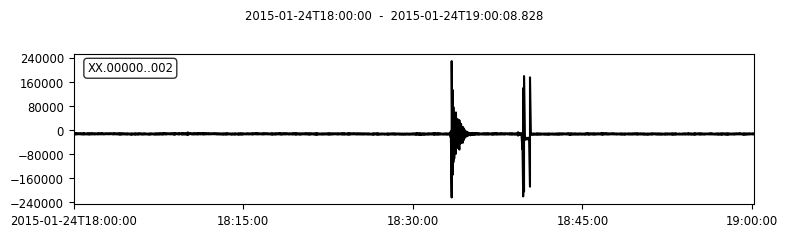

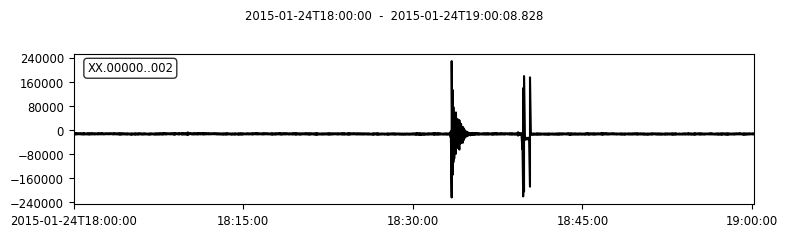

In [6]:
a.plot()

c:\Users\jepul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


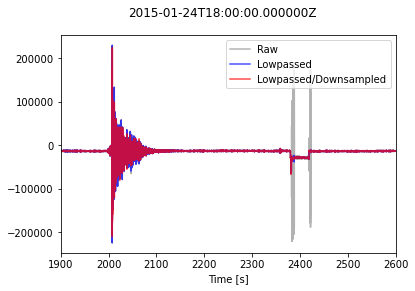

In [21]:
tr
tr_new = tr.copy()
tr_new.decimate (factor=10, strict_length=False)


tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=0.4 * tr.stats.sampling_rate / 4.0)

# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
t_new = np.arange(0, tr_new.stats.npts / tr_new.stats.sampling_rate,
                  tr_new.stats.delta)

plt.plot(t, tr.data, 'k', label='Raw', alpha=0.3)
plt.plot(t, tr_filt.data, 'b', label='Lowpassed', alpha=0.7)
plt.plot(t_new, tr_new.data, 'r', label='Lowpassed/Downsampled', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(1900, 2600)
plt.suptitle(tr.stats.starttime)
plt.legend()
plt.show()


c:\Users\jepul\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


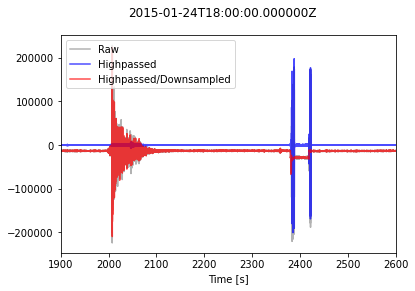

In [22]:
tr
tr_new = tr.copy()
tr_new.decimate (factor=10, strict_length=False)


tr_filt = tr.copy()
tr_filt.filter('highpass', freq=0.4 * tr.stats.sampling_rate / 4.0)

# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
t_new = np.arange(0, tr_new.stats.npts / tr_new.stats.sampling_rate,
                  tr_new.stats.delta)

plt.plot(t, tr.data, 'k', label='Raw', alpha=0.3)
plt.plot(t, tr_filt.data, 'b', label='Highpassed', alpha=0.7)
plt.plot(t_new, tr_new.data, 'r', label='Highpassed/Downsampled', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(1900, 2600)
plt.suptitle(tr.stats.starttime)
plt.legend()
plt.show()

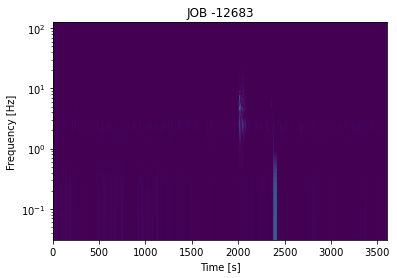

In [26]:
tr.spectrogram(log=True, title='JOB ' + str(tr[1900]))